この画面のID～Directionまでをコピーしてtrade.csvというファイル名のファイルに貼っていく。

<img src="resorce\TOPSTEP.png" alt="TOPSTEPの約定履歴画面" width="500"/>

下記のように貼り付けられるはず…

<img src="resorce\CSV_example.png" alt="CSVのサンプル" width="500"/>

まずはtrade.csvを読み込みDataFrame形式で扱えるようにする

In [12]:
pip install pandas

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [13]:
import pandas as pd
from datetime import datetime

def parse_datetime(date_string):
    """特殊な日時形式をパースする"""
    return datetime.strptime(date_string.strip(), "%B %d %Y @ %I:%M:%S %p")

def parse_price(price_str):
    """カンマを含む価格文字列をfloatに変換する"""
    return float(price_str.replace(',', '').replace('$', '').strip())

def read_trade_data(file_path):
    """CSVファイルからトレードデータを読み込み、構造化されたDataFrameに変換する"""
    with open(file_path, 'r') as file:
        lines = file.readlines()
    
    trades = []
    for i in range(0, len(lines), 12):  # 12行で1トレード
        if i + 11 < len(lines):
            trade = {
                'id': lines[i].strip(),
                'symbol': lines[i + 1].strip(),
                'size': int(lines[i + 2].strip()),
                'entry_time': parse_datetime(lines[i + 3]),
                'exit_time': parse_datetime(lines[i + 4]),
                'entry_price': parse_price(lines[i + 5]),
                'exit_price': parse_price(lines[i + 6]),
                'pnl': parse_price(lines[i + 7]),
                'commission': parse_price(lines[i + 8]),
                'fees': parse_price(lines[i + 9]),
                'direction': lines[i + 10].strip()
            }
            trades.append(trade)
    
    return pd.DataFrame(trades)

# Jupyternotebookで実行する部分
# %%
# データの読み込み
file_path = "trade.csv"
df = read_trade_data(file_path)

# 基本的な情報の確認
print("=== データの基本情報 ===")
print(f"トレード総数: {len(df)}")
print("\n=== データフレームの先頭5行 ===")
display(df.head())

# 基本的な統計情報
print("\n=== 損益の基本統計 ===")
print(df['pnl'].describe())

# 日付ごとの集計
df['trade_date'] = df['entry_time'].dt.date
daily_summary = df.groupby('trade_date').agg({
    'pnl': ['count', 'sum', 'mean'],
    'size': 'sum'
}).round(2)

print("\n=== 日別サマリー ===")
display(daily_summary)

=== データの基本情報 ===
トレード総数: 68

=== データフレームの先頭5行 ===


,id,symbol,size,entry_time,exit_time,entry_price,exit_price,pnl,commission,fees,direction
0,504886786,/MNQ,5,2025-01-04 01:17:02,2025-01-04 01:19:46,21368.25,21380.00,-117.5,0.0,-3.70,Short
1,504857518,/MNQ,5,2025-01-04 01:10:43,2025-01-04 01:14:32,21345.75,21361.00,-152.5,0.0,-3.70,Short
2,504768524,/MNQ,2,2025-01-04 00:59:38,2025-01-04 01:02:47,21374.75,21380.00,-21.0,0.0,-1.48,Short
3,504769583,/MNQ,3,2025-01-04 00:59:38,2025-01-04 01:02:53,21374.75,21385.25,-63.0,0.0,-2.22,Short
4,504608623,/MNQ,5,2025-01-04 00:33:18,2025-01-04 00:38:24,21340.25,21340.25,0.0,0.0,-3.70,Long



=== 損益の基本統計 ===
count     68.000000
mean      21.558824
std      134.259065
min     -292.500000
25%      -42.125000
50%        0.000000
75%       74.375000
max      568.000000
Name: pnl, dtype: float64

=== 日別サマリー ===


pnl                size
           count    sum    mean  sum
trade_date                          
2024-12-12     5  -40.5   -8.10    5
2024-12-13     5   63.0   12.60    5
2024-12-14     1  292.5  292.50    1
2024-12-17     3  -23.0   -7.67    3
2024-12-19     2  160.0   80.00    2
2024-12-20     2  -40.5  -20.25    3
2024-12-24     3  324.0  108.00    6
2024-12-26     1  299.0  299.00    2
2024-12-28     9  -82.0   -9.11   10
2025-01-01    16 -417.0  -26.06   24
2025-01-02     5  703.0  140.60    5
2025-01-03     6  663.5  110.58   10
2025-01-04    10 -436.0  -43.60   31

下記は1日を単位とした際のトレード回数ごとの期待値を算出するコード

In [14]:
pip install matplotlib seaborn

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


=== Statistics by Number of Trades ===

Trade #1 (13 days of data):
  Expectancy per Contract: $52.65
  Average P/L per Trade: $41.69
  Average Cumulative P/L: $41.69

Trade #2 (11 days of data):
  Expectancy per Contract: $11.58
  Average P/L per Trade: $5.27
  Average Cumulative P/L: $10.55

Trade #3 (9 days of data):
  Expectancy per Contract: $19.27
  Average P/L per Trade: $27.76
  Average Cumulative P/L: $83.28

Trade #4 (7 days of data):
  Expectancy per Contract: $17.86
  Average P/L per Trade: $20.12
  Average Cumulative P/L: $80.50

Trade #5 (7 days of data):
  Expectancy per Contract: $21.01
  Average P/L per Trade: $22.43
  Average Cumulative P/L: $112.14

Trade #6 (4 days of data):
  Expectancy per Contract: $5.83
  Average P/L per Trade: $10.44
  Average Cumulative P/L: $62.62

Trade #7 (3 days of data):
  Expectancy per Contract: $-13.77
  Average P/L per Trade: $-21.55
  Average Cumulative P/L: $-150.83

Trade #8 (3 days of data):
  Expectancy per Contract: $-14.00
  Av

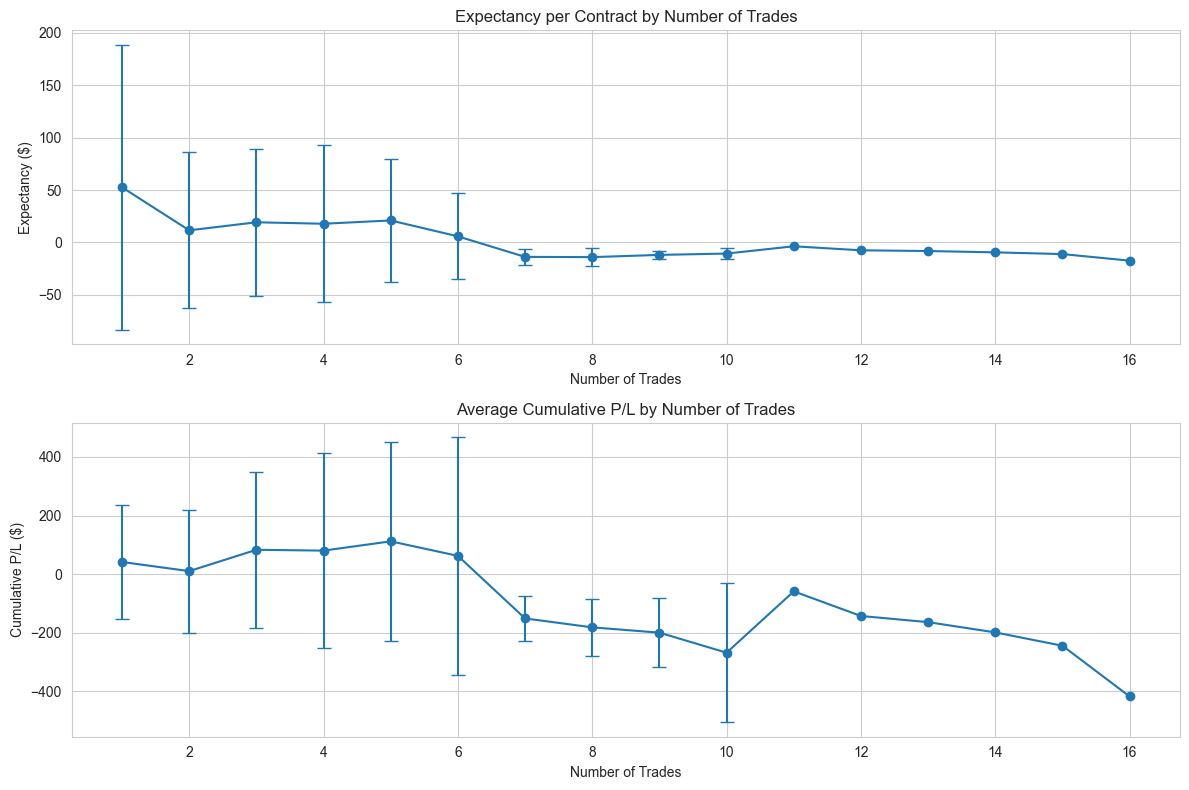

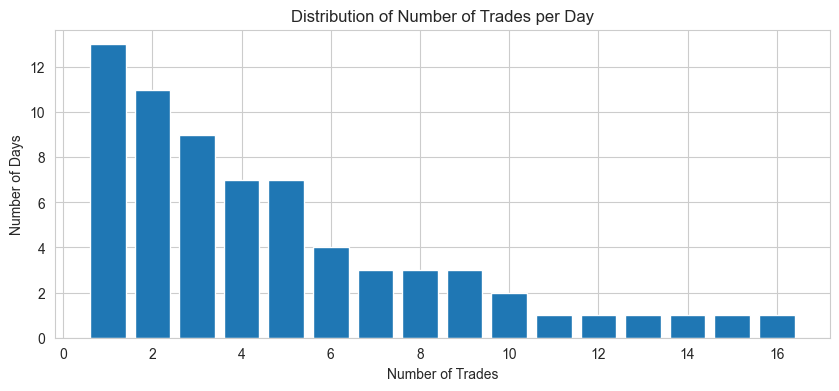

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set seaborn style
sns.set_style("whitegrid")

def analyze_trade_progression(df):
    """Analyze expectancy progression by number of trades per day"""
    daily_stats = []
    
    for date in df['trade_date'].unique():
        day_trades = df[df['trade_date'] == date].sort_values('entry_time')
        
        total_pnl = 0
        total_contracts = 0
        
        for i, (_, trade) in enumerate(day_trades.iterrows(), 1):
            total_pnl += trade['pnl']
            total_contracts += trade['size']
            
            stats = {
                'date': date,
                'trade_number': i,
                'cumulative_pnl': total_pnl,
                'cumulative_contracts': total_contracts,
                'expectancy_per_contract': total_pnl / total_contracts,
                'avg_pnl_per_trade': total_pnl / i
            }
            daily_stats.append(stats)
    
    return pd.DataFrame(daily_stats)

# Execute analysis
daily_progression = analyze_trade_progression(df)

# Calculate statistics by number of trades
trade_number_stats = daily_progression.groupby('trade_number').agg({
    'expectancy_per_contract': ['mean', 'std', 'count'],
    'avg_pnl_per_trade': ['mean', 'std'],
    'cumulative_pnl': ['mean', 'std']
}).round(2)

# Organize column names
trade_number_stats.columns = [
    'avg_expectancy_per_contract',
    'std_expectancy_per_contract',
    'days_with_this_many_trades',
    'avg_pnl_per_trade',
    'std_pnl_per_trade',
    'avg_cumulative_pnl',
    'std_cumulative_pnl'
]

# Print statistics
print("=== Statistics by Number of Trades ===")
for trade_num in trade_number_stats.index:
    stats = trade_number_stats.loc[trade_num]
    print(f"\nTrade #{trade_num} ({int(stats['days_with_this_many_trades'])} days of data):")
    print(f"  Expectancy per Contract: ${stats['avg_expectancy_per_contract']:.2f}")
    print(f"  Average P/L per Trade: ${stats['avg_pnl_per_trade']:.2f}")
    print(f"  Average Cumulative P/L: ${stats['avg_cumulative_pnl']:.2f}")

# Create graphs
plt.figure(figsize=(12, 8))

# Plot expectancy progression
plt.subplot(2, 1, 1)
plt.errorbar(trade_number_stats.index, 
            trade_number_stats['avg_expectancy_per_contract'],
            yerr=trade_number_stats['std_expectancy_per_contract'],
            fmt='o-', capsize=5)
plt.title('Expectancy per Contract by Number of Trades')
plt.xlabel('Number of Trades')
plt.ylabel('Expectancy ($)')
plt.grid(True)

# Plot cumulative P/L progression
plt.subplot(2, 1, 2)
plt.errorbar(trade_number_stats.index,
            trade_number_stats['avg_cumulative_pnl'],
            yerr=trade_number_stats['std_cumulative_pnl'],
            fmt='o-', capsize=5)
plt.title('Average Cumulative P/L by Number of Trades')
plt.xlabel('Number of Trades')
plt.ylabel('Cumulative P/L ($)')
plt.grid(True)

plt.tight_layout()
plt.show()

# Check data distribution
plt.figure(figsize=(10, 4))
plt.bar(trade_number_stats.index, trade_number_stats['days_with_this_many_trades'])
plt.title('Distribution of Number of Trades per Day')
plt.xlabel('Number of Trades')
plt.ylabel('Number of Days')
plt.grid(True)
plt.show()

時間帯別の統計分析：

トレード回数
総損益
平均損益
1契約あたりの期待値
標準偏差


4つのグラフを作成：

時間帯別トレード回数
時間帯別総損益（プラス：緑、マイナス：赤）
時間帯別平均損益
時間帯別期待値


詳細な統計情報の出力：

各時間帯の詳細な統計情報
最も収益の良い/悪い時間帯
平均損益が最も良い/悪い時間帯

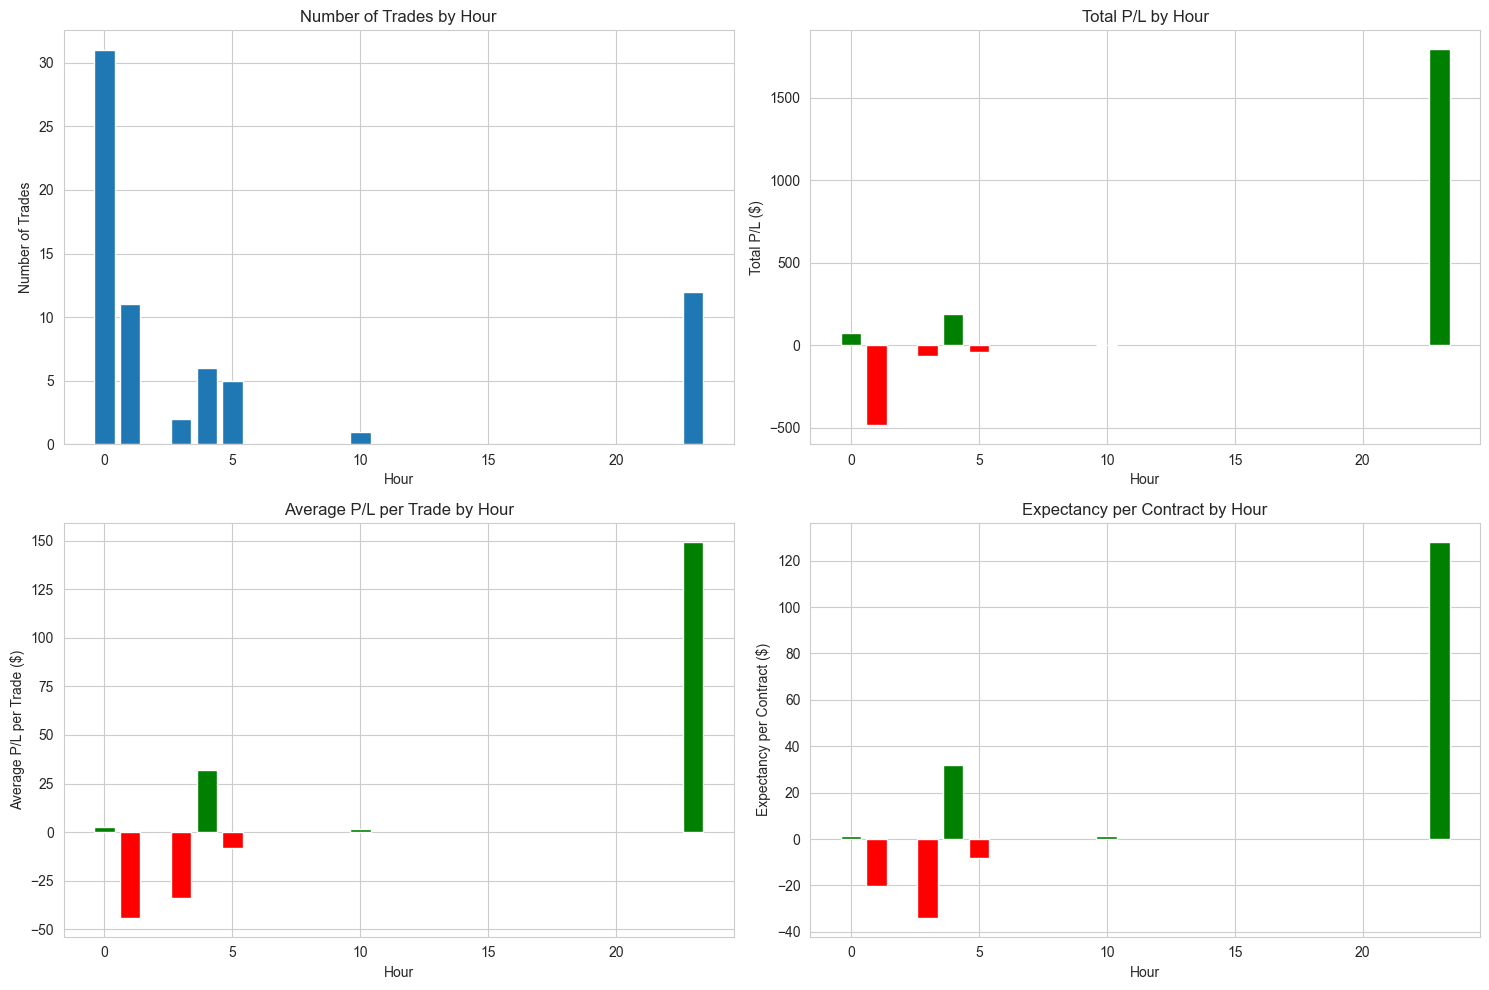


=== Hourly Trading Statistics ===

Detailed Statistics:
      trade_count  total_pnl  avg_pnl_per_trade  pnl_std  total_contracts  \
hour                                                                        
0              31       73.5               2.37   123.87               55   
1              11     -486.0             -44.18    90.72               24   
3               2      -68.0             -34.00    11.31                2   
4               6      191.5              31.92   113.68                6   
5               5      -40.5              -8.10    11.29                5   
10              1        1.5               1.50      NaN                1   
23             12     1794.0             149.50   173.95               14   

      expectancy_per_contract  
hour                           
0                        1.34  
1                      -20.25  
3                      -34.00  
4                       31.92  
5                       -8.10  
10                       

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

# Set seaborn style
sns.set_style("whitegrid")

def analyze_hourly_performance(df):
    """Analyze trading performance by hour"""
    
    # Extract hour from entry_time
    df['hour'] = df['entry_time'].dt.hour
    
    # Calculate hourly statistics
    hourly_stats = df.groupby('hour').agg({
        'pnl': ['count', 'sum', 'mean', 'std'],
        'size': 'sum'
    }).round(2)
    
    # Rename columns for clarity
    hourly_stats.columns = [
        'trade_count',
        'total_pnl',
        'avg_pnl_per_trade',
        'pnl_std',
        'total_contracts'
    ]
    
    # Calculate expectancy per contract
    hourly_stats['expectancy_per_contract'] = hourly_stats['total_pnl'] / hourly_stats['total_contracts']
    
    return hourly_stats

# Execute analysis
hourly_stats = analyze_hourly_performance(df)

# Create visualization
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(15, 10))

# Plot 1: Number of trades by hour
ax1.bar(hourly_stats.index, hourly_stats['trade_count'])
ax1.set_title('Number of Trades by Hour')
ax1.set_xlabel('Hour')
ax1.set_ylabel('Number of Trades')
ax1.grid(True)

# Plot 2: Total P/L by hour
ax2.bar(hourly_stats.index, hourly_stats['total_pnl'], 
        color=['g' if x >= 0 else 'r' for x in hourly_stats['total_pnl']])
ax2.set_title('Total P/L by Hour')
ax2.set_xlabel('Hour')
ax2.set_ylabel('Total P/L ($)')
ax2.grid(True)

# Plot 3: Average P/L per trade by hour
ax3.bar(hourly_stats.index, hourly_stats['avg_pnl_per_trade'],
        color=['g' if x >= 0 else 'r' for x in hourly_stats['avg_pnl_per_trade']])
ax3.set_title('Average P/L per Trade by Hour')
ax3.set_xlabel('Hour')
ax3.set_ylabel('Average P/L per Trade ($)')
ax3.grid(True)

# Plot 4: Expectancy per contract by hour
ax4.bar(hourly_stats.index, hourly_stats['expectancy_per_contract'],
        color=['g' if x >= 0 else 'r' for x in hourly_stats['expectancy_per_contract']])
ax4.set_title('Expectancy per Contract by Hour')
ax4.set_xlabel('Hour')
ax4.set_ylabel('Expectancy per Contract ($)')
ax4.grid(True)

plt.tight_layout()
plt.show()

# Print detailed statistics
print("\n=== Hourly Trading Statistics ===")
print("\nDetailed Statistics:")
print(hourly_stats.round(2))

# Calculate and print best and worst hours
best_hour_total = hourly_stats['total_pnl'].idxmax()
worst_hour_total = hourly_stats['total_pnl'].idxmin()
best_hour_avg = hourly_stats['avg_pnl_per_trade'].idxmax()
worst_hour_avg = hourly_stats['avg_pnl_per_trade'].idxmin()

print("\nBest/Worst Hours Summary:")
print(f"\nBy Total P/L:")
print(f"Best Hour: {best_hour_total}:00 (${hourly_stats.loc[best_hour_total, 'total_pnl']:.2f})")
print(f"Worst Hour: {worst_hour_total}:00 (${hourly_stats.loc[worst_hour_total, 'total_pnl']:.2f})")

print(f"\nBy Average P/L per Trade:")
print(f"Best Hour: {best_hour_avg}:00 (${hourly_stats.loc[best_hour_avg, 'avg_pnl_per_trade']:.2f})")
print(f"Worst Hour: {worst_hour_avg}:00 (${hourly_stats.loc[worst_hour_avg, 'avg_pnl_per_trade']:.2f})")

初手のトレードがプラスかマイナスかで分類しその次のトレードの結果(+10~-10ドルの範囲は建値カットとして除外)

    def is_significant_trade(pnl):
        """Filter out breakeven trades (±$10)"""
        return abs(pnl) > 10

この部分で建値カットの額を調整しているので適宜変えてください。

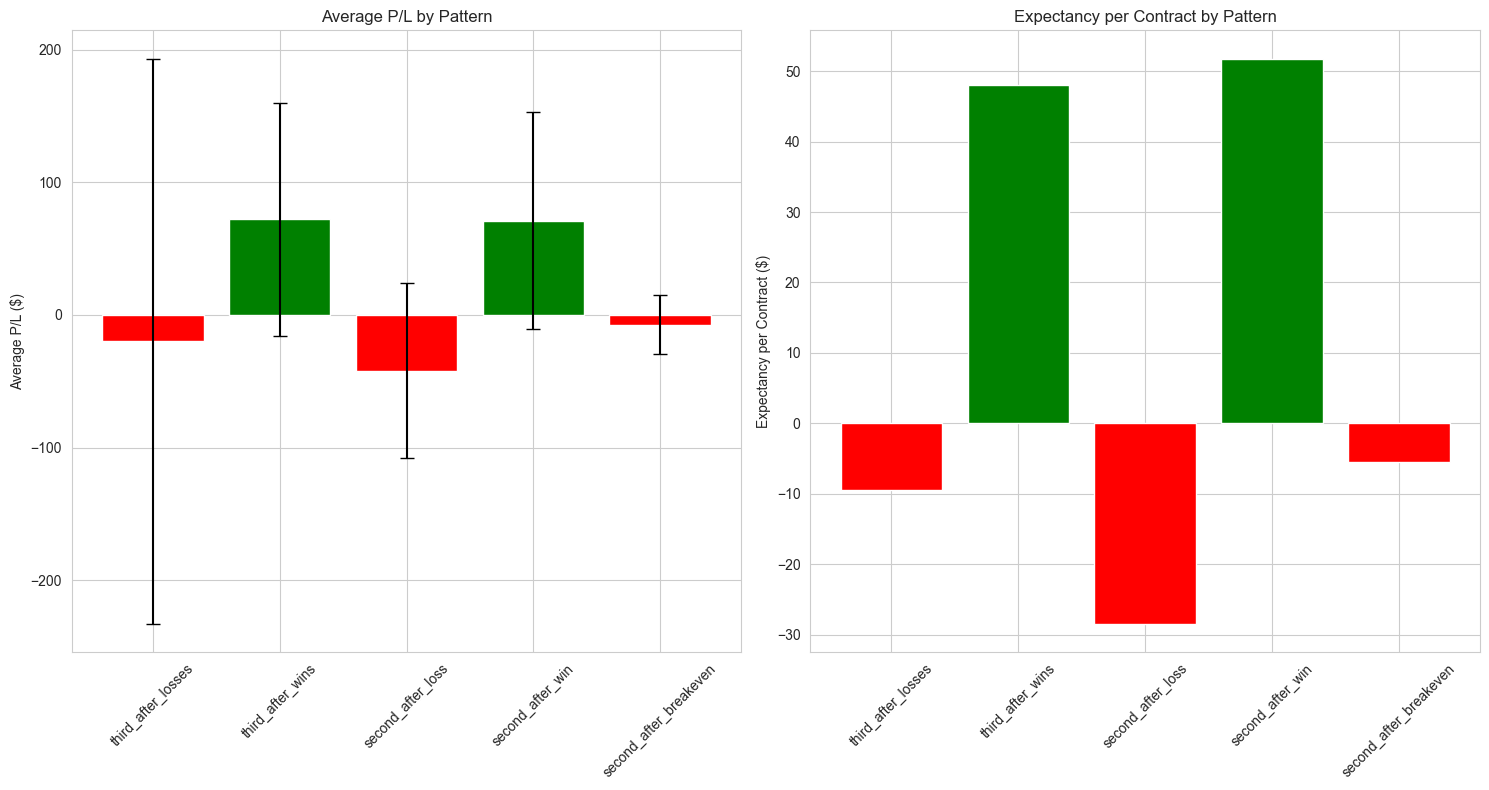


=== Pattern Analysis Results ===

Third After Losses:
Number of trades: 11
Average P/L: $-19.73
Expectancy per contract: $-9.43
Win rate: 27.3%
Standard deviation: $212.92

Third After Wins:
Number of trades: 10
Average P/L: $72.00
Expectancy per contract: $48.00
Win rate: 80.0%
Standard deviation: $87.54

Second After Loss:
Number of trades: 19
Average P/L: $-41.92
Expectancy per contract: $-28.45
Win rate: 21.1%
Standard deviation: $66.10

Second After Win:
Number of trades: 16
Average P/L: $71.19
Expectancy per contract: $51.77
Win rate: 75.0%
Standard deviation: $81.78

Second After Breakeven:
Number of trades: 3
Average P/L: $-7.33
Expectancy per contract: $-5.50
Win rate: 33.3%
Standard deviation: $22.38


In [17]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

def analyze_consecutive_patterns(df):
    """
    Analyze trading patterns within the same day:
    1. Second trade after a winning first trade
    2. Second trade after a losing first trade
    3. Third trade after two consecutive wins
    4. Third trade after two consecutive losses
    5. Second trade after a breakeven trade
    
    Excludes breakeven trades (P/L between -$10 and +$10)
    """
    pattern_trades = {
        'third_after_losses': [],  # Third trade (after two losses)
        'third_after_wins': [],    # Third trade (after two wins)
        'second_after_loss': [],   # Second trade (after loss)
        'second_after_win': [],    # Second trade (after win)
        'second_after_breakeven': [] # Second trade (after breakeven)
    }
    
    def is_significant_trade(pnl):
        """Filter out breakeven trades (±$10)"""
        return abs(pnl) > 10
    
    for date in df['trade_date'].unique():
        day_trades = df[df['trade_date'] == date].sort_values('entry_time')
        
        if len(day_trades) >= 3:
            for i in range(len(day_trades) - 2):
                three_trades = day_trades.iloc[i:i+3]
                
                pnl_1 = three_trades.iloc[0]['pnl']
                pnl_2 = three_trades.iloc[1]['pnl']
                pnl_3 = three_trades.iloc[2]['pnl']
                
                # Handle breakeven first trade
                if not is_significant_trade(pnl_1) and is_significant_trade(pnl_2):
                    pattern_trades['second_after_breakeven'].append({
                        'date': date,
                        'pnl': three_trades.iloc[1]['pnl'],
                        'size': three_trades.iloc[1]['size']
                    })

                # Handle significant trades
                if is_significant_trade(pnl_1) and is_significant_trade(pnl_2):
                    # Analyze third trade
                    if is_significant_trade(pnl_3):
                        if pnl_1 < 0 and pnl_2 < 0:
                            pattern_trades['third_after_losses'].append({
                                'date': date,
                                'pnl': pnl_3,
                                'size': three_trades.iloc[2]['size']
                            })
                        elif pnl_1 > 0 and pnl_2 > 0:
                            pattern_trades['third_after_wins'].append({
                                'date': date,
                                'pnl': pnl_3,
                                'size': three_trades.iloc[2]['size']
                            })
                    
                    # Analyze second trade
                    if pnl_1 < 0:
                        pattern_trades['second_after_loss'].append({
                            'date': date,
                            'pnl': pnl_2,
                            'size': three_trades.iloc[1]['size']
                        })
                    else:
                        pattern_trades['second_after_win'].append({
                            'date': date,
                            'pnl': pnl_2,
                            'size': three_trades.iloc[1]['size']
                        })
    
    # Calculate statistics
    stats = {}
    for pattern_name, trades in pattern_trades.items():
        if trades:
            trades_df = pd.DataFrame(trades)
            stats[pattern_name] = {
                'count': len(trades_df),
                'avg_pnl': trades_df['pnl'].mean(),
                'expectancy_per_contract': trades_df['pnl'].sum() / trades_df['size'].sum(),
                'win_rate': (trades_df['pnl'] > 0).mean() * 100,
                'std_dev': trades_df['pnl'].std()
            }
        else:
            stats[pattern_name] = {
                'count': 0,
                'avg_pnl': 0,
                'expectancy_per_contract': 0,
                'win_rate': 0,
                'std_dev': 0
            }
    
    return stats

# 分析の実行
pattern_stats = analyze_consecutive_patterns(df)

# 結果の可視化
plt.figure(figsize=(15, 8))

patterns = list(pattern_stats.keys())
metrics = ['avg_pnl', 'expectancy_per_contract']
colors = ['green' if 'win' in p else 'red' for p in patterns]

# Plot average P/L
plt.subplot(1, 2, 1)
plt.bar(patterns, [pattern_stats[p]['avg_pnl'] for p in patterns], 
        color=colors,
        yerr=[pattern_stats[p]['std_dev'] for p in patterns],
        capsize=5)
plt.title('Average P/L by Pattern')
plt.xticks(rotation=45)
plt.ylabel('Average P/L ($)')
plt.grid(True)

# Plot expectancy per contract
plt.subplot(1, 2, 2)
plt.bar(patterns, [pattern_stats[p]['expectancy_per_contract'] for p in patterns],
        color=colors)
plt.title('Expectancy per Contract by Pattern')
plt.xticks(rotation=45)
plt.ylabel('Expectancy per Contract ($)')
plt.grid(True)

plt.tight_layout()
plt.show()

# Print detailed statistics
print("\n=== Pattern Analysis Results ===")
for pattern, stats in pattern_stats.items():
    print(f"\n{pattern.replace('_', ' ').title()}:")
    print(f"Number of trades: {stats['count']}")
    print(f"Average P/L: ${stats['avg_pnl']:.2f}")
    print(f"Expectancy per contract: ${stats['expectancy_per_contract']:.2f}")
    print(f"Win rate: {stats['win_rate']:.1f}%")
    print(f"Standard deviation: ${stats['std_dev']:.2f}")

exit後5分以内にポジションを取った際の成績

if time_diff <= timedelta(minutes=5):

ここのif文の5分を変えればn分以内にポジションを取った成績になるので適宜変更してください。


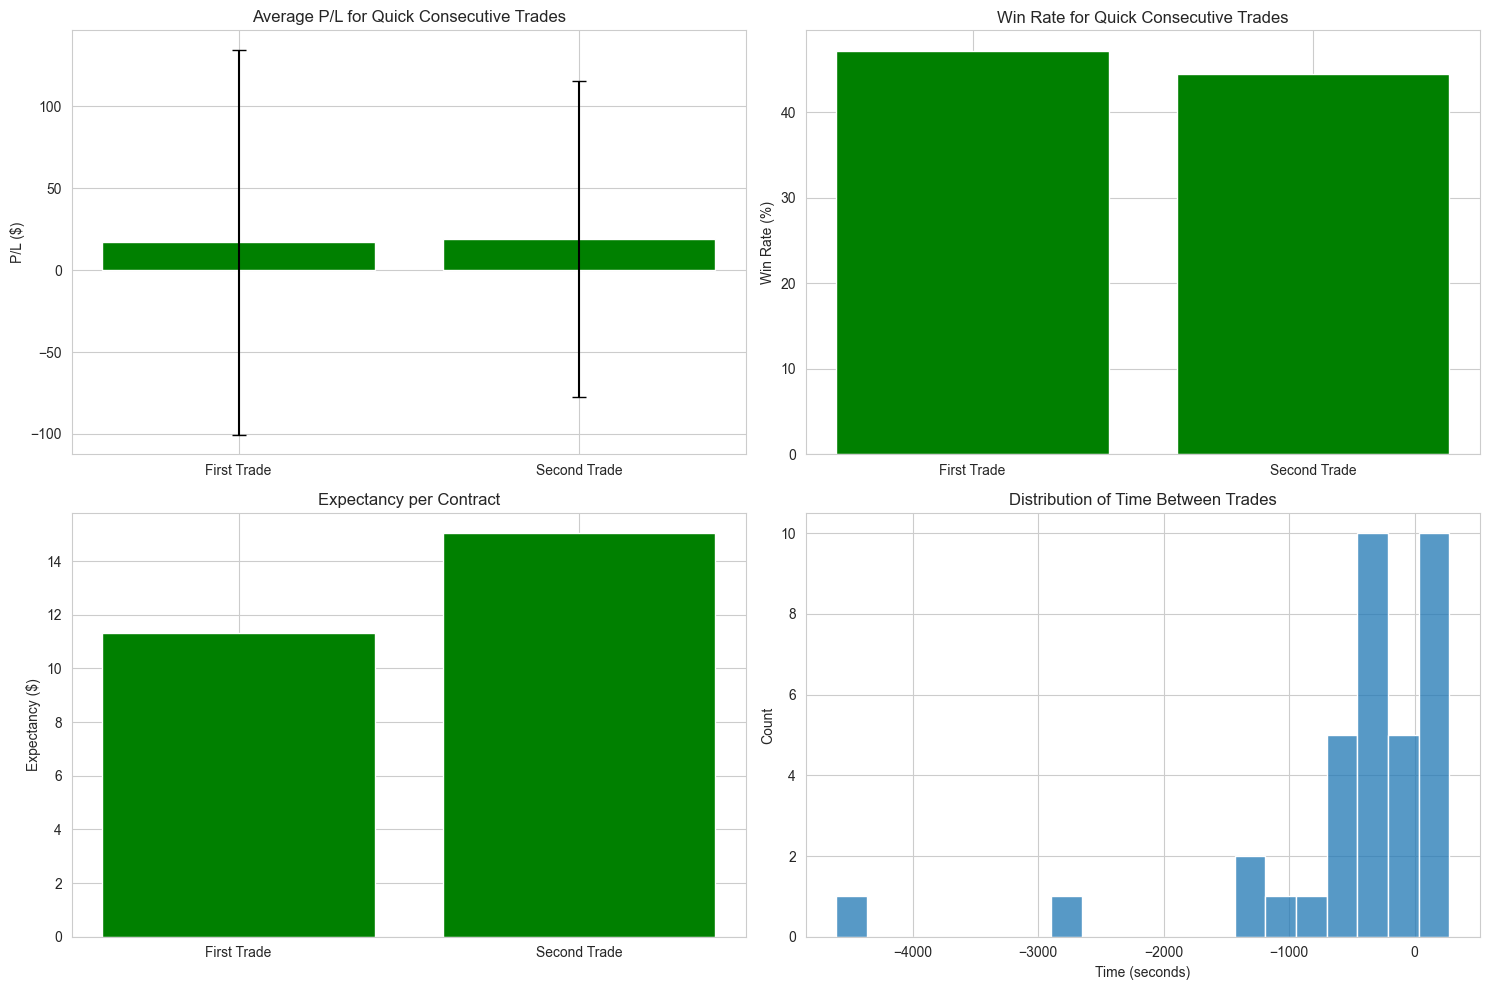


=== Quick Consecutive Trades Analysis ===
Total pairs of trades within 5 minutes: 36
Average time between trades: -7.77 minutes

First Trade Statistics:
Average P/L: $17.00
Win Rate: 47.2%
Expectancy per Contract: $11.33
Standard Deviation: $117.46

Second Trade Statistics:
Average P/L: $18.79
Win Rate: 44.4%
Expectancy per Contract: $15.03
Standard Deviation: $96.29


In [18]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import timedelta

def analyze_quick_consecutive_trades(df):
    """
    Analyze trades that occur within 5 minutes of each other
    """
    # Sort trades by entry time
    df = df.sort_values('entry_time')
    
    quick_trades = []
    
    for date in df['trade_date'].unique():
        day_trades = df[df['trade_date'] == date].copy()
        
        for i in range(len(day_trades) - 1):
            current_trade = day_trades.iloc[i]
            next_trade = day_trades.iloc[i + 1]
            
            # Calculate time difference between trades
            time_diff = next_trade['entry_time'] - current_trade['exit_time']
            
            # If trades are within 5 minutes of each other
            if time_diff <= timedelta(minutes=5):
                quick_trades.append({
                    'date': date,
                    'time_diff_seconds': time_diff.total_seconds(),
                    'first_pnl': current_trade['pnl'],
                    'second_pnl': next_trade['pnl'],
                    'first_size': current_trade['size'],
                    'second_size': next_trade['size']
                })
    
    quick_trades_df = pd.DataFrame(quick_trades)
    
    if len(quick_trades_df) == 0:
        return None
    
    # Calculate statistics
    stats = {
        'total_pairs': len(quick_trades_df),
        'avg_time_diff': quick_trades_df['time_diff_seconds'].mean() / 60,  # Convert to minutes
        'first_trade': {
            'avg_pnl': quick_trades_df['first_pnl'].mean(),
            'win_rate': (quick_trades_df['first_pnl'] > 0).mean() * 100,
            'expectancy': quick_trades_df['first_pnl'].sum() / quick_trades_df['first_size'].sum(),
            'std_dev': quick_trades_df['first_pnl'].std()
        },
        'second_trade': {
            'avg_pnl': quick_trades_df['second_pnl'].mean(),
            'win_rate': (quick_trades_df['second_pnl'] > 0).mean() * 100,
            'expectancy': quick_trades_df['second_pnl'].sum() / quick_trades_df['second_size'].sum(),
            'std_dev': quick_trades_df['second_pnl'].std()
        }
    }
    
    return stats, quick_trades_df

# Execute analysis
results = analyze_quick_consecutive_trades(df)

if results is not None:
    stats, quick_trades_df = results
    
    # Create visualization
    fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(15, 10))
    
    # Plot 1: Average P/L comparison
    trades = ['First Trade', 'Second Trade']
    avg_pnl = [stats['first_trade']['avg_pnl'], stats['second_trade']['avg_pnl']]
    std_dev = [stats['first_trade']['std_dev'], stats['second_trade']['std_dev']]
    colors = ['green' if pnl >= 0 else 'red' for pnl in avg_pnl]
    
    ax1.bar(trades, avg_pnl, yerr=std_dev, capsize=5, color=colors)
    ax1.set_title('Average P/L for Quick Consecutive Trades')
    ax1.set_ylabel('P/L ($)')
    ax1.grid(True)
    
    # Plot 2: Win Rate comparison
    win_rates = [stats['first_trade']['win_rate'], stats['second_trade']['win_rate']]
    ax2.bar(trades, win_rates, color=colors)
    ax2.set_title('Win Rate for Quick Consecutive Trades')
    ax2.set_ylabel('Win Rate (%)')
    ax2.grid(True)
    
    # Plot 3: Expectancy comparison
    expectancy = [stats['first_trade']['expectancy'], stats['second_trade']['expectancy']]
    ax3.bar(trades, expectancy, color=colors)
    ax3.set_title('Expectancy per Contract')
    ax3.set_ylabel('Expectancy ($)')
    ax3.grid(True)
    
    # Plot 4: Time difference distribution
    sns.histplot(data=quick_trades_df, x='time_diff_seconds', bins=20, ax=ax4)
    ax4.set_title('Distribution of Time Between Trades')
    ax4.set_xlabel('Time (seconds)')
    ax4.set_ylabel('Count')
    ax4.grid(True)
    
    plt.tight_layout()
    plt.show()
    
    # Print detailed statistics
    print("\n=== Quick Consecutive Trades Analysis ===")
    print(f"Total pairs of trades within 5 minutes: {stats['total_pairs']}")
    print(f"Average time between trades: {stats['avg_time_diff']:.2f} minutes")
    
    print("\nFirst Trade Statistics:")
    print(f"Average P/L: ${stats['first_trade']['avg_pnl']:.2f}")
    print(f"Win Rate: {stats['first_trade']['win_rate']:.1f}%")
    print(f"Expectancy per Contract: ${stats['first_trade']['expectancy']:.2f}")
    print(f"Standard Deviation: ${stats['first_trade']['std_dev']:.2f}")
    
    print("\nSecond Trade Statistics:")
    print(f"Average P/L: ${stats['second_trade']['avg_pnl']:.2f}")
    print(f"Win Rate: {stats['second_trade']['win_rate']:.1f}%")
    print(f"Expectancy per Contract: ${stats['second_trade']['expectancy']:.2f}")
    print(f"Standard Deviation: ${stats['second_trade']['std_dev']:.2f}")
else:
    print("No quick consecutive trades found in the data.")